<p style = "font-size : 38px; color : #393e46 ; font-family : 'Comic Sans MS'; text-align : center; background-color : #00adb5; border-radius: 5px 5px;"><strong>Data Modelling for Adirani DS Hackathon</strong></p>

# Upon exploring the data, we observed a strong correlation between the default channel group and the conversion rate. Also, timing might be potential factors for the conversion

In [1]:
import pandas as pd
import datetime
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.preprocessing import MinMaxScaler


df = pd.read_csv("Data_v2.csv",header=1)
df.columns

Index(['Nth day', 'Date', 'Month', 'DOW',
       'Faro Blanco Resort Yacht Club - Reservations - Room Availability',
       'Hotels In Marathon FL | Faro Blanco Resort & Marina',
       'Faro Blanco Resort | Resorts in Marathon FL | Official Website',
       'Faro Blanco Resort Yacht Club - Reservations - Guest Details',
       'Marathon Key Restaurants | Dining | Faro Blanco Resort & Marina',
       'page_view', 'user_engagement', 'session_start', 'first_visit',
       'scroll', 'United States', 'Canada', 'India',
       'active_users_trending_30 days', 'active_users_trending_7 days',
       'active_users_trending_1 day', 'DAU/MAU', 'DAU/WAU', 'WAU/MAU',
       'Total revenue', 'Total purchasers', 'First time purchasers',
       'Average purchase revenue per user',
       'conversions_booking_engine_entrances', 'conversions_food_beverage_kpi',
       'conversions_purchase', 'conversions_meetings_rfp', 'total_conversions',
       'default_channel_group_Unassigned', 'default_channel_gro

In [2]:
def get_date_and_day(nth_day):
    # start date is 2022-01-29
    date = datetime.date(2022, 1, 29) + datetime.timedelta(days=nth_day-1)
    return date, date.strftime('%A'), date.strftime('%B'), 

df[['date', 'day', 'month']] = df['Nth day'].apply(get_date_and_day).apply(pd.Series)

In [3]:
# add one hot encoding 
one_hot_df = pd.get_dummies(df['Month'], prefix='Month')
df = df.join(one_hot_df)
df

,Nth day,Date,Month,DOW,Faro Blanco Resort Yacht Club - Reservations - Room Availability,Hotels In Marathon FL | Faro Blanco Resort & Marina,Faro Blanco Resort | Resorts in Marathon FL | Official Website,Faro Blanco Resort Yacht Club - Reservations - Guest Details,Marathon Key Restaurants | Dining | Faro Blanco Resort & Marina,page_view,...,day,month,Month_1,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
0,138,16/06/22,6,Thursday,324,0,296,36,126,1183,...,Wednesday,June,0,1,0,0,0,0,0,0
1,139,17/06/22,6,Friday,351,0,436,46,175,1559,...,Thursday,June,0,1,0,0,0,0,0,0
2,140,18/06/22,6,Saturday,349,0,439,42,214,1458,...,Friday,June,0,1,0,0,0,0,0,0
3,141,19/06/22,6,Sunday,411,0,475,43,216,1695,...,Saturday,June,0,1,0,0,0,0,0,0
4,142,20/06/22,6,Monday,505,0,489,57,192,1893,...,Sunday,June,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,361,25/01/23,1,Wednesday,829,587,0,136,0,2450,...,Tuesday,January,1,0,0,0,0,0,0,0
224,362,26/01/23,1,Thursday,1200,547,0,204,0,2740,...,Wednesday,January,1,0,0,0,0,0,0,0
225,363,27/01/23,1,Friday,1188,537,0,264,0,2856,...,Thursday,January,1,0,0,0,0,0,0,0
226,364,28/01/23,1,Saturday,1043,580,0,204,0,2607,...,Friday,January,1,0,0,0,0,0,0,0


In [4]:
one_hot_df = pd.get_dummies(df['day'], prefix='day')
df = df.join(one_hot_df)


In [5]:
df.columns

Index(['Nth day', 'Date', 'Month', 'DOW',
       'Faro Blanco Resort Yacht Club - Reservations - Room Availability',
       'Hotels In Marathon FL | Faro Blanco Resort & Marina',
       'Faro Blanco Resort | Resorts in Marathon FL | Official Website',
       'Faro Blanco Resort Yacht Club - Reservations - Guest Details',
       'Marathon Key Restaurants | Dining | Faro Blanco Resort & Marina',
       'page_view', 'user_engagement', 'session_start', 'first_visit',
       'scroll', 'United States', 'Canada', 'India',
       'active_users_trending_30 days', 'active_users_trending_7 days',
       'active_users_trending_1 day', 'DAU/MAU', 'DAU/WAU', 'WAU/MAU',
       'Total revenue', 'Total purchasers', 'First time purchasers',
       'Average purchase revenue per user',
       'conversions_booking_engine_entrances', 'conversions_food_beverage_kpi',
       'conversions_purchase', 'conversions_meetings_rfp', 'total_conversions',
       'default_channel_group_Unassigned', 'default_channel_gro

<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; "><strong>Cross-correlation with potential features</strong></p>

<AxesSubplot:>

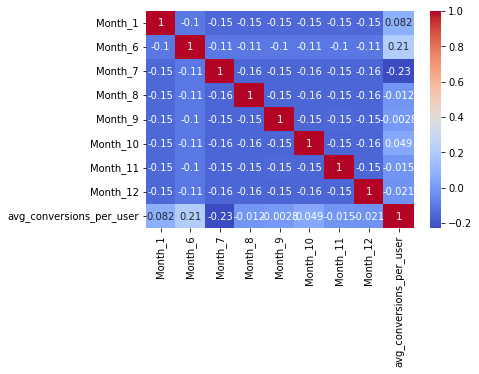

In [6]:
# select columns to include in correlation matrix
import seaborn as sns
cols = ['Month_1', 'Month_6', 'Month_7', 'Month_8', 'Month_9',
       'Month_10', 'Month_11', 'Month_12']
cols.append('avg_conversions_per_user')

# compute correlation matrix
corr = df[cols].corr()

# create heatmap
sns.heatmap(corr, cmap='coolwarm', annot=True)


<AxesSubplot:>

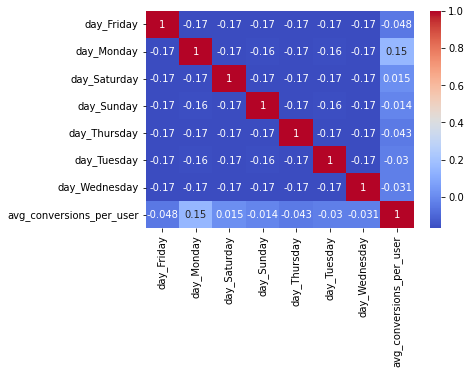

In [7]:
cols = ['day_Friday', 'day_Monday',
       'day_Saturday', 'day_Sunday', 'day_Thursday', 'day_Tuesday',
       'day_Wednesday']
cols.append('avg_conversions_per_user')
corr = df[cols].corr()
sns.heatmap(corr, cmap='coolwarm', annot=True)

<p style = "font-size : 20px; color : #810000 ; font-family : 'Comic Sans MS'; "><strong> Based on the cross-relation analysis of time variables, we found that the month of June and Monday has a high conversion rate.</strong></p>

<AxesSubplot:>

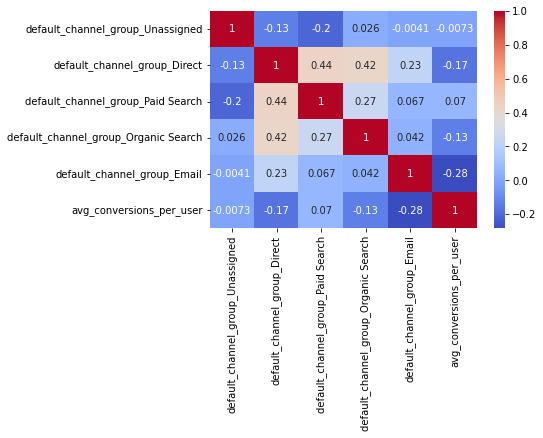

In [8]:
cols = ['default_channel_group_Unassigned', 'default_channel_group_Direct',
       'default_channel_group_Paid Search',
       'default_channel_group_Organic Search', 'default_channel_group_Email']
cols.append('avg_conversions_per_user')
corr = df[cols].corr()
sns.heatmap(corr, cmap='coolwarm', annot=True)

<p style = "font-size : 20px; color : #810000 ; font-family : 'Comic Sans MS'; "><strong> Based on the cross-relation analysis of customer channels, we have found a significant relationship between channel types and conversion rates. However, the numbers may differ slightly from those in the yearly summary due to the lack of detailed daily patterns of users. </strong></p>

<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; "><strong>Regression based on all variables</strong></p>

                            Variable  Coefficient
         default_channel_group_Email    -0.135645
        default_channel_group_Direct    -0.112482
default_channel_group_Organic Search    -0.105207
                             Month_6     0.094197
   default_channel_group_Paid Search     0.065147
    default_channel_group_Unassigned    -0.041675
                          day_Monday     0.039264
                             Month_7    -0.035869
                            Month_12    -0.034917
                             Month_1     0.027646
                        day_Thursday    -0.024877
                            Month_11    -0.020221
                          day_Friday    -0.018284
                             Month_9    -0.017070
                         day_Tuesday     0.009826
                            Month_10    -0.007604
                             Month_8    -0.006162
                       day_Wednesday    -0.005320
                        day_Saturday    -0.004754


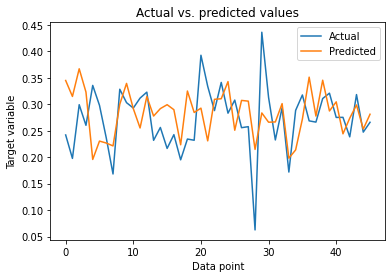

In [9]:
key_features = ['Month_1', 'Month_6', 'Month_7', 'Month_8', 'Month_9',
       'Month_10', 'Month_11', 'Month_12', 'day_Friday', 'day_Monday',
       'day_Saturday', 'day_Sunday', 'day_Thursday', 'day_Tuesday',
       'day_Wednesday', 'default_channel_group_Unassigned', 'default_channel_group_Direct',
       'default_channel_group_Paid Search',
       'default_channel_group_Organic Search', 'default_channel_group_Email',
]
X = df.loc[:, key_features]
y = df.loc[:, ['avg_conversions_per_user']]

# select the columns to be normalize
scaler = MinMaxScaler()
cols_to_normalize = ['default_channel_group_Unassigned', 'default_channel_group_Direct',
       'default_channel_group_Paid Search',
       'default_channel_group_Organic Search', 'default_channel_group_Email']
X[cols_to_normalize] = scaler.fit_transform(X[cols_to_normalize]) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
alpha = 0.1  # regularization parameter
model = Ridge(alpha=alpha)
model.fit(X_train, y_train)

coef = model.coef_[0]
names = X.columns
coef_df = pd.DataFrame({'Variable': names, 'Coefficient': coef})
coef_df = coef_df.reindex(coef_df['Coefficient'].abs().sort_values(ascending=False).index)
print(coef_df.to_string(index=False))

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Data point')
plt.ylabel('Target variable')
plt.title('Actual vs. predicted values')
plt.legend()
plt.show()

<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; "><strong>Regression based on time variables</strong></p>

     Variable  Coefficient
      Month_6     0.074589
      Month_7    -0.072028
   day_Monday     0.037230
      Month_1     0.025434
day_Wednesday    -0.019684
 day_Thursday    -0.017610
     Month_11    -0.014385
   day_Friday    -0.008567
     Month_12    -0.007227
      Month_8    -0.007176
 day_Saturday     0.005176
     Month_10     0.003491
      Month_9    -0.002697
  day_Tuesday     0.002626
   day_Sunday     0.000830


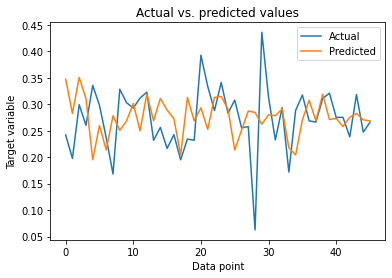

In [10]:
key_features = ['Month_1', 'Month_6', 'Month_7', 'Month_8', 'Month_9',
       'Month_10', 'Month_11', 'Month_12', 'day_Friday', 'day_Monday',
       'day_Saturday', 'day_Sunday', 'day_Thursday', 'day_Tuesday',
       'day_Wednesday',
]
X = df.loc[:, key_features]
y = df.loc[:, ['avg_conversions_per_user']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train the model
alpha = 0.1  # regularization parameter
model = Ridge(alpha=alpha)
model.fit(X_train, y_train)

# print coefficient
coef = model.coef_[0]
names = X.columns
coef_df = pd.DataFrame({'Variable': names, 'Coefficient': coef})
coef_df = coef_df.reindex(coef_df['Coefficient'].abs().sort_values(ascending=False).index)
print(coef_df.to_string(index=False))

# draw the figure
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Data point')
plt.ylabel('Target variable')
plt.title('Actual vs. predicted values')
plt.legend()
plt.show()

<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; "><strong>Regression based on customer channels </strong></p>

                            Variable  Coefficient
   default_channel_group_Paid Search     0.000678
        default_channel_group_Direct    -0.000359
default_channel_group_Organic Search    -0.000351
         default_channel_group_Email    -0.000213
    default_channel_group_Unassigned     0.000048


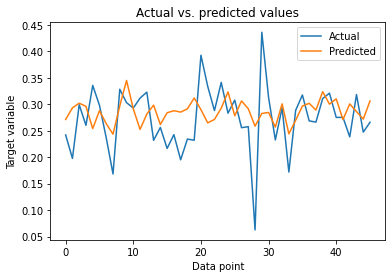

In [11]:
key_features = ['default_channel_group_Unassigned', 'default_channel_group_Direct',
       'default_channel_group_Paid Search',
       'default_channel_group_Organic Search', 'default_channel_group_Email',
]
X = df.loc[:, key_features]
y = df.loc[:, ['avg_conversions_per_user']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train the model
alpha = 0.1  # regularization parameter
model = Ridge(alpha=alpha)
model.fit(X_train, y_train)

# print coefficient
coef = model.coef_[0]
names = X.columns
coef_df = pd.DataFrame({'Variable': names, 'Coefficient': coef})
coef_df = coef_df.reindex(coef_df['Coefficient'].abs().sort_values(ascending=False).index)
print(coef_df.to_string(index=False))

# draw the figure
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Data point')
plt.ylabel('Target variable')
plt.title('Actual vs. predicted values')
plt.legend()
plt.show()

<p style = "font-size : 20px; color : #810000 ; font-family : 'Comic Sans MS'; "><strong> Based on the cross-relation analysis and regression coefficient values, it appears that time variables and customer default channels could be useful features for building our model. We may be able to improve the accuracy of the model if we have a summary of customer behavior details on a daily basis. </strong></p>